In [1]:
import numpy as np  # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt# type: ignore
from sklearn.model_selection import train_test_split  # type: ignore
import seaborn as sns # type: ignore    
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
id_test = test[['PassengerId']]
pas = 0.001

nb_iter = 10000
data.shape
id_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

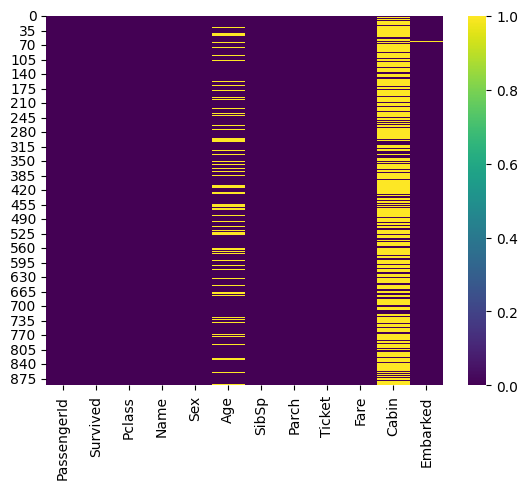

In [3]:
sns.heatmap(data.isnull(),cbar=True,cmap='viridis') 


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop([ 'Name' ,'PassengerId','Cabin' , 'Ticket' ], axis=1, inplace=True)

test.drop([ 'Name' ,'PassengerId','Cabin' , 'Ticket' ], axis=1, inplace=True)

#for the  age 
mean = data["Age"].mean()

data["Age"] = data["Age"].fillna(mean)

mean = test["Age"].mean()

test["Age"] = test["Age"].fillna(mean) 

mean = test["Fare"].mean()

test["Fare"] = test["Fare"].fillna(mean)

data.dropna(inplace=True)

categorical_cols = ['Sex', 'Embarked']


df1 = pd.get_dummies(data[categorical_cols[0]] , drop_first=True).astype(int)
df1_test = pd.get_dummies(test[categorical_cols[0]] , drop_first=True).astype(int)
# print(df1.head()) 
data.drop([categorical_cols[0]], axis=1, inplace=True)
test.drop([categorical_cols[0]], axis=1, inplace=True)
data = pd.concat([data, df1], axis=1)
test = pd.concat([test, df1_test], axis=1)
df1 = pd.get_dummies(data[categorical_cols[1]], drop_first=True).astype(int)
df1_test = pd.get_dummies(test[categorical_cols[1]], drop_first=True).astype(int)
data.drop([categorical_cols[1]], axis=1, inplace=True)
test.drop([categorical_cols[1]], axis=1, inplace=True)
data = pd.concat([data, df1], axis=1)
test = pd.concat([test, df1_test], axis=1)


#normalization
mean = data['Fare'].mean()
std = data['Fare'].std()
mean2 = test['Age'].mean()
std2 = test['Age'].std()
data['Fare'] = (data['Fare'] - mean) / std

test['Fare'] = (test['Fare'] -mean) / std
data['Age'] = (data['Age'] -mean2 ) / std2
test['Age'] = (test['Age']  -mean2 ) / std2






<Axes: >

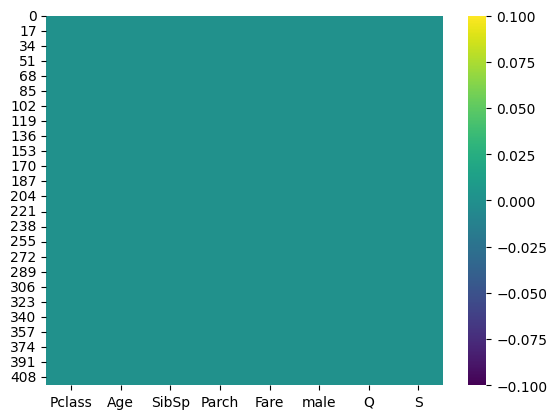

In [6]:
sns.heatmap(test.isnull(),cbar=True,cmap='viridis') 


In [7]:
X_train, X_cv, y_train, y_cv = train_test_split(data.drop('Survived', axis=1), data[['Survived']], test_size=0.2 , random_state=42)
X_train.shape, X_cv.shape, y_train.shape, y_cv.shape


((711, 8), (178, 8), (711, 1), (178, 1))

In [8]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
708,1,-0.654760,0,0,2.403608,0,0,1
240,3,-0.045389,1,0,-0.354997,0,0,0
382,3,0.136721,0,0,-0.486376,1,0,1
792,3,-0.045389,8,2,0.753626,0,0,1
683,3,-1.287945,5,2,0.297868,1,0,1


In [9]:
y_train.head()

,Survived
708,1
240,0
382,0
792,0
683,0


In [10]:
theta= np.zeros(X_train.shape[1]).reshape(-1,1)
print(theta.shape)
def sigmoide (X , theta):
          return 1 / (1 + np.exp(-(np.dot(X, theta))))

(8, 1)


In [11]:
# def cost(X, y, theta):
#           return (1/X.shape[0]) * np.sum(-y * np.log(sigmoide(X, theta)) - (1 - y) * np.log(1 - sigmoide(X, theta)))

In [12]:
def cost(X, y, theta ):
          lambda_ = 10
          cost = (1/X.shape[0]) * np.sum(-y * np.log(sigmoide(X, theta)) - (1 - y) * np.log(1 - sigmoide(X, theta))) 
          reg = (lambda_ / (2 * X.shape[0])) * np.sum(theta**2)
          return cost + reg


In [13]:
def gradient_descent(X , theta , y , pas):
          return  theta - pas * (1/X.shape[0]) * np.dot(X.T , sigmoide(X, theta) - y)


In [14]:
costs = []
def  fit(X , theta , y , pas , nb_iter):
          for _ in range(nb_iter):
            theta = gradient_descent(X , theta , y , pas)
            # print(cost(X , y , theta))
            if _ % 100 == 0:
                costs.append(cost(X , y , theta)) 
          return theta

t = fit(X_train , theta , y_train , pas , nb_iter)
t

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Python312\Lib\site-packag

array([[-0.08347055],
       [-0.18941146],
       [-0.16278518],
       [ 0.13081219],
       [ 0.42182447],
       [-0.71236152],
       [ 0.0570985 ],
       [-0.00548929]])

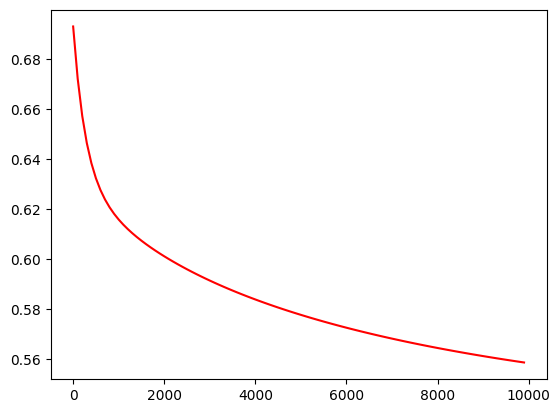

In [15]:
ites = [i for i in range(0, nb_iter, 100)]
plt.plot(ites  , costs, c='r')
plt.show()
# print(len(ites))

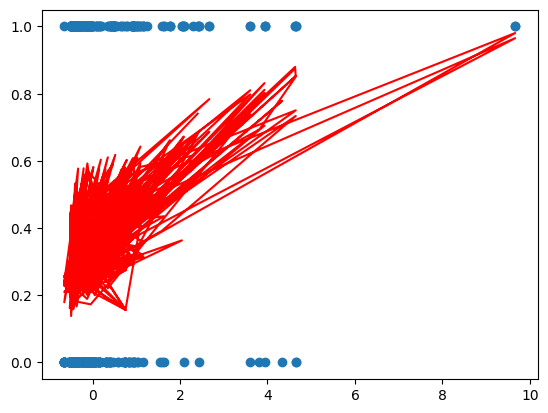

In [16]:
plt.scatter(X_train['Fare'], y_train)
plt.plot(X_train['Fare'], sigmoide(X_train , t) , c='r')
plt.show()

In [17]:
def predict(X_test , theta):
                      return np.round(sigmoide(X_test , theta))

yhat = predict(X_train.iloc[2, :], t)
print(yhat)
print(y_train.iloc[2])


[0.]
Survived    0
Name: 382, dtype: int64


In [18]:
cv_cost = cost(X_cv, y_cv, t)
print(cv_cost)

Survived    0.562125
dtype: float64


c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
import sklearn.metrics as classificationReport
y_pred = predict(X_cv, t)
y_pred = (y_pred >= 0.5).astype(int)
print(classificationReport.classification_report(y_cv, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       109
           1       0.86      0.35      0.49        69

    accuracy                           0.72       178
   macro avg       0.78      0.66      0.65       178
weighted avg       0.76      0.72      0.69       178



In [20]:
y_pred = predict(test, t).ravel()
print(y_pred.shape)
print(id_test.shape)

id_test = id_test.values.ravel()
print(id_test.shape)

submission = pd.DataFrame({
          "PassengerId": id_test,
          "Survived": y_pred.astype(int)
})
print(submission['PassengerId'][0], y_pred[0])
submission.to_csv('submission.csv', index=False)


(418,)
(418, 1)
(418,)
892 0.0
